In [88]:
#Necessary modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
import csv

### Cut down the G dwarf binary sample to only systems with M secondaries. 

In [89]:
#Cut down to M dwarf secondaries
data_path = '/Users/jessicaschonhut/flares_paper/'
trilegal_path = '/Users/jessicaschonhut/flares_paper/trilegal_data/'

sample = pd.read_csv(data_path + 'G_with_binaries_with_parameters_3.csv')
rows = sample[(sample["sec_temp"] <= np.log10(4000))]
print('There are ' + str(len(rows['logTe'])) + ' G/M binaries in this sample.')
rows.to_csv(data_path + 'final_sample_gm_binaries.csv', index=False) # Save to a new CSV file

There are 18735 G/M binaries in this sample.


In [91]:
print(str(round(18735/36299 * 100)) + '% of the G dwarf binary systems have an M dwarf as their binary companion.')

52% of the G dwarf binary systems have an M dwarf as their binary companion.


In [48]:
M_dwarfs = pd.read_csv(data_path + 'final_sample_gm_binaries.csv')
m_teff = M_dwarfs['sec_temp']
m_comp = M_dwarfs['sec_comp']
g_teff = M_dwarfs['logTe']
g_comp = M_dwarfs['[M/H]']
periods = M_dwarfs['periods']

### Plotting primary parameters along with secondary parameters.

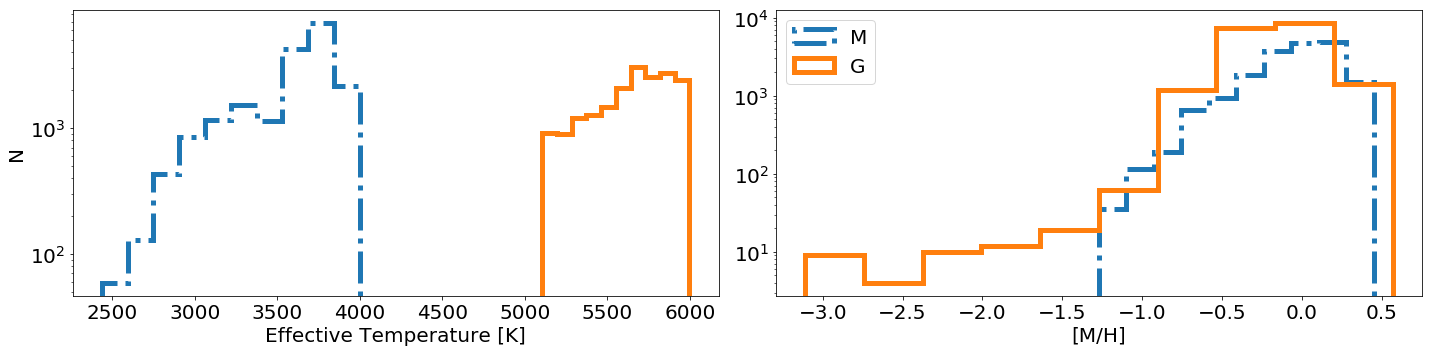

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(10**m_teff, histtype='step', linewidth=5, linestyle='-.')
plt.hist(10**g_teff, histtype='step', linewidth=5)
plt.xlabel('Effective Temperature [K]', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('N', fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')

plt.subplot(122)
plt.hist(m_comp, histtype='step', label='M', linewidth=5, linestyle='-.')
plt.hist(g_comp, histtype='step', label='G',linewidth=5)
plt.legend(fontsize=20)
plt.yscale('log')
plt.xlabel('[M/H]', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig('/Users/jessicaschonhut/flares_paper/M_and_G_parameters.png')
plt.show()

### Investigating the relationship between the two stars in each system in terms of composition and orbital period (cmap)

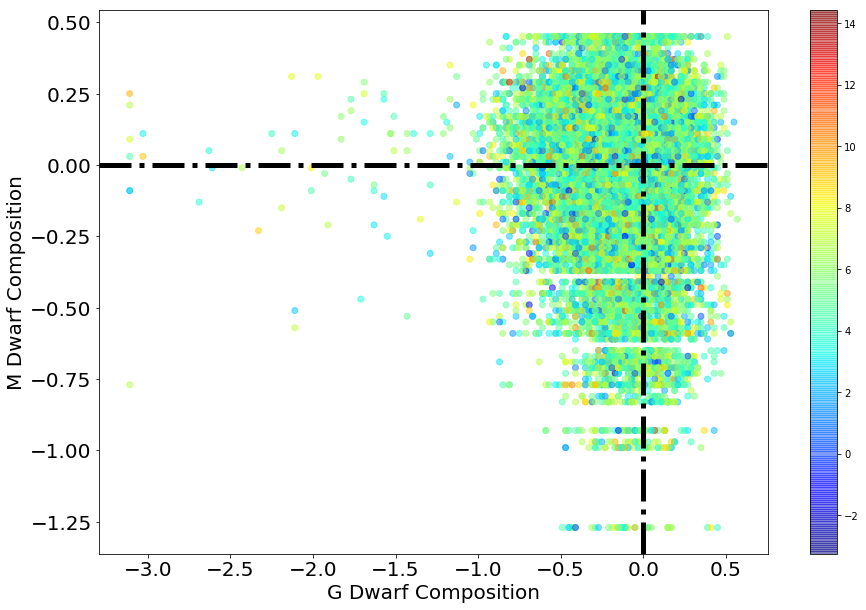

In [60]:
plt.figure(figsize=(15, 10))
plt.scatter(g_comp, m_comp, c=periods, cmap='jet', alpha=0.5)
plt.xlabel('G Dwarf Composition', fontsize=20)
plt.ylabel('M Dwarf Composition', fontsize=20)
plt.axvline(0, linestyle='-.', linewidth=5, color='black')
plt.axhline(0, linestyle='-.', linewidth=5, color='black')
plt.colorbar()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/Users/jessicaschonhut/flares_paper/m_g_comp_comparison.png')
plt.show()

### Investigating the relative composition of the primary and secondary stars in terms of number density. 

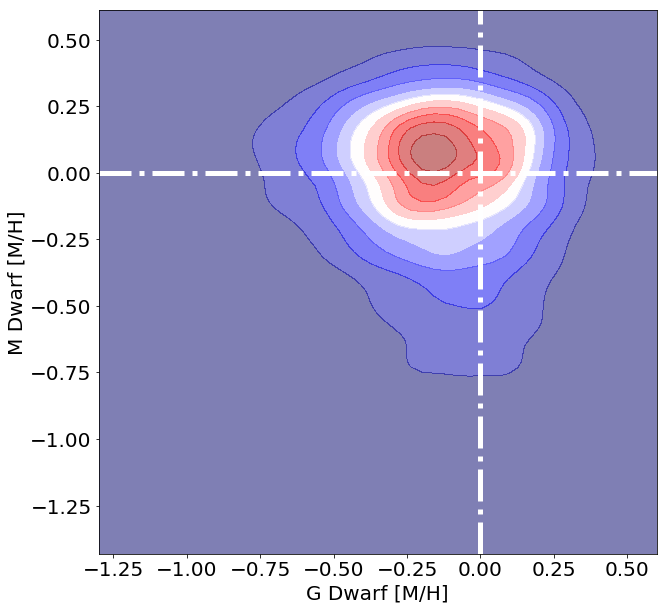

In [87]:
plt.figure(figsize=(10, 10))
sns.kdeplot(g_comp, m_comp, shade=True, cmap='seismic', alpha=0.5)
plt.axvline(0, linestyle='-.', linewidth=5, color='white')
plt.axhline(0, linestyle='-.', linewidth=5, color='white')
plt.xlabel('G Dwarf [M/H]', fontsize=20)
plt.ylabel('M Dwarf [M/H]', fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-1.30, 0.6)
plt.xticks(fontsize=20)
plt.savefig('/Users/jessicaschonhut/flares_paper/composition_number_density.png')
plt.show()